In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Set Max display rows and columns
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Import the data
housing_df = pd.read_csv("Resources/housing_df_clean.csv")
print(housing_df.head())
print("Input file has been read in")

   MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig LandSlope  \
0          60       RL         65.0     8450      Reg    Inside       Gtl   
1          20       RL         80.0     9600      Reg       FR2       Gtl   
2          60       RL         68.0    11250      IR1    Inside       Gtl   
3          70       RL         60.0     9550      IR1    Corner       Gtl   
4          60       RL         84.0    14260      IR1       FR2       Gtl   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd ExterQual  \
0       2003

In [4]:
# Get shape of housing dataframe
housing_df.shape

(1460, 56)

In [5]:
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold      

In [6]:
# Get dataframe field information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  ExterQua

In [7]:
# Get value counts for all housing_df columns
for col in housing_df.columns:
    print(f'-------------------- {col} START --------------------')
    print(housing_df[col].value_counts(dropna=False))
    print(f'-------------------- {col} END ----------------------')
    print('\n')

print("Value counts for all housing_df columns Complete")

-------------------- MSSubClass START --------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
-------------------- MSSubClass END ----------------------


-------------------- MSZoning START --------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
-------------------- MSZoning END ----------------------


-------------------- LotFrontage START --------------------
LotFrontage
70.0     329
60.0     143
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      1

GarageCond
TA             1326
DoesNotHave      81
Fa               35
Gd                9
Po                7
Ex                2
Name: count, dtype: int64
-------------------- GarageCond END ----------------------


-------------------- WoodDeckSF START --------------------
WoodDeckSF
0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
208     10
240     10
216      9
180      8
160      8
264      6
96       6
156      6
250      6
143      6
132      6
196      5
105      5
210      5
288      5
171      5
48       5
104      4
64       4
125      4
220      4
182      4
158      4
74       4
36       4
147      4
142      3
201      3
149      3
113      3
280      3
203      3
112      3
88       3
178      3
165      3
239      3
335      3
164      3
108      3
40       3
188      3
150      3
72       3
80       3
268      3
172      3
198      3
270      3
431      2
222      2
154      2
135      2
155      2
55       2
184      2
256     

In [8]:
# List housing dataframe columns
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## Split into training and testing sets for encoding, scaling, and initial modeling to identify VIF and P-Values

In [9]:
# Make an X variable with all columns except SalePrice
X = housing_df.drop(columns = ['SalePrice'])
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# Set the target variable y
y = housing_df['SalePrice']

In [11]:
# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create list of category columns that need to be encoded
cols_to_encode = ['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional',
                  'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']

# Create an instance of the label encoder
le = LabelEncoder()

# Copy X_train and X_test before encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Fit and transform the label encoder with X_train for each column
# Transform X_test with the label encoder for each column
for col in cols_to_encode:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    
print('---------- X_train_encoded ----------')
print(X_train_encoded.head())
print('\n')
print('---------- X_test_encoded ----------')
print(X_test_encoded.head())

---------- X_train_encoded ----------
      MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
1023         120         3         43.0     3182         3          4   
810           20         3         78.0    10140         3          4   
1384          50         3         60.0     9060         3          4   
626           20         3         70.0    12342         0          4   
813           20         3         75.0     9750         3          4   

      LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  \
1023          0             0           2         4           2            7   
810           0            14           2         0           2            6   
1384          0             7           2         0           0            6   
626           0            12           2         0           2            5   
813           0            12           2         0           2            6   

      OverallCond  YearBuilt  YearRemodAdd

C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [13]:
# Get dataframe field information
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 1023 to 1126
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1095 non-null   int64  
 1   MSZoning       1095 non-null   int32  
 2   LotFrontage    1095 non-null   float64
 3   LotArea        1095 non-null   int64  
 4   LotShape       1095 non-null   int32  
 5   LotConfig      1095 non-null   int32  
 6   LandSlope      1095 non-null   int32  
 7   Neighborhood   1095 non-null   int32  
 8   Condition1     1095 non-null   int32  
 9   BldgType       1095 non-null   int32  
 10  HouseStyle     1095 non-null   int32  
 11  OverallQual    1095 non-null   int64  
 12  OverallCond    1095 non-null   int64  
 13  YearBuilt      1095 non-null   int64  
 14  YearRemodAdd   1095 non-null   int64  
 15  RoofStyle      1095 non-null   int32  
 16  Exterior1st    1095 non-null   int32  
 17  Exterior2nd    1095 non-null   int32  
 18  ExterQual 

In [14]:
# Create list of numeric columns that need to be scaled
cols_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold']

# Scale the training data
scaler = StandardScaler()

# Copy X_train_encoded and X_test_encoded before scaling
X_train_encoded_scaled = X_train_encoded.copy()
X_test_encoded_scaled = X_test_encoded.copy()

# Fit and transform Standard scaler with X_train_scaled for each column
# Transform X_test with the Standard scaler for each column
#for col in cols_to_scale:
X_train_encoded_scaled[cols_to_scale] = scaler.fit_transform(X_train_encoded[cols_to_scale])
X_test_encoded_scaled[cols_to_scale] = scaler.transform(X_test_encoded[cols_to_scale])


print('---------- X_train_encoded_scaled ----------')
#print(X_train_encoded_scaled[:5])
print(X_train_encoded_scaled.head())
print('\n')
print('---------- X_test_encoded_scaled ----------')
#print(X_test_encoded_scaled[:5])
print(X_train_encoded_scaled.head())

---------- X_train_encoded_scaled ----------
      MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LotConfig  \
1023    1.475911         3    -1.198986 -0.683950         3          4   
810    -0.871228         3     0.336917 -0.054883         3          4   
1384   -0.167086         3    -0.452976 -0.152524         3          4   
626    -0.871228         3    -0.014147  0.144198         0          4   
813    -0.871228         3     0.205268 -0.090142         3          4   

      LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  \
1023          0             0           2         4           2     0.637073   
810           0            14           2         0           2    -0.094926   
1384          0             7           2         0           0    -0.094926   
626           0            12           2         0           2    -0.826925   
813           0            12           2         0           2    -0.094926   

      OverallCond  YearBuilt 

C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

## Train a Linear Regression model using encoded and scaled dataframe to calculate VIF to identify fields that should be removed

In [15]:
# Create the models
lr = LinearRegression()

# Fit the model to the training data. 
lr.fit(X_train_encoded_scaled, y_train)


C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LinearRegression()

## Evaluate the model

In [16]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our models to make prediction
predicted = lr.predict(X_test_encoded_scaled)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"All Features:")
print(f"encoded_scaled -- mean squared error (MSE): {mse}")
print(f"encoded_scaled -- R-squared (R2): {r2}")


All Features:
encoded_scaled -- mean squared error (MSE): 1123186505.8668683
encoded_scaled -- R-squared (R2): 0.8396663876675368


C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [17]:
# Create a function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [18]:
# Calculate vif for the X_train_encoded_scaled dataframe
print('---------- VIF X_train_encoded_scaled ----------')
print(calc_vif(X_train_encoded_scaled).sort_values("VIF"))

---------- VIF X_train_encoded_scaled ----------
        variables         VIF
51         MoSold    1.067014
52         YrSold    1.078757
48     WoodDeckSF    1.267509
49    OpenPorchSF    1.282481
50  EnclosedPorch    1.288688
6       LandSlope    1.568643
2     LotFrontage    1.689522
3         LotArea    1.705834
12    OverallCond    1.727792
32   BsmtFullBath    2.050006
34       HalfBath    2.274195
35   BedroomAbvGr    2.629685
14   YearRemodAdd    2.678319
28      HeatingQC    2.989649
33       FullBath    3.029032
4        LotShape    3.502119
11    OverallQual    3.615751
39     Fireplaces    4.222566
15      RoofStyle    4.640237
5       LotConfig    4.797411
0      MSSubClass    4.840409
42    GarageYrBlt    4.862293
37   TotRmsAbvGrd    4.885118
41     GarageType    5.154945
9        BldgType    5.230907
24   BsmtFinType1    5.815268
7    Neighborhood    5.891666
44     GarageCars    5.921514
45     GarageArea    5.923637
8      Condition1    6.989729
10     HouseStyle    

In [19]:
# Create another X variable by dropping all columns with VIF scores greater than 10
cols_to_drop = ['BsmtUnfSF','BsmtFinSF1', 'BsmtQual', 'TotalBsmtSF', 'SaleCondition', 'BsmtCond', 'KitchenQual',
                'SaleType', 'ExterCond', 'MSZoning', 'Functional', 'ExterQual', 'Exterior2nd', 'Exterior1st',
                'GarageQual', 'GarageCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea']

X_vif_train = X_train_encoded_scaled.drop(columns=cols_to_drop)
X_vif_test = X_test_encoded_scaled.drop(columns=cols_to_drop)

# Recalculate the VIF scores
print('---------- VIF X_vif_train ----------')
calc_vif(X_vif_train).sort_values('VIF')


---------- VIF X_vif_train ----------


,variables,VIF
34,MoSold,1.044362
35,YrSold,1.054252
32,OpenPorchSF,1.205621
31,WoodDeckSF,1.213741
33,EnclosedPorch,1.264350
19,BsmtFullBath,1.385225
5,LandSlope,1.509154
1,LotFrontage,1.555279
11,OverallCond,1.573370
21,HalfBath,1.573938


In [20]:
# Train two models using the different X variables to compare VIF dataframe to non-VIF dataframe

# Create the models
lr1 = LinearRegression()
lr2 = LinearRegression()

# Fit the models
lr1.fit(X_train_encoded_scaled, y_train)
lr2.fit(X_vif_train, y_train)

C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LinearRegression()

In [21]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [22]:
# Compare the adjusted r-squared of the two models
adj_score1 = r2_adj(X_test_encoded_scaled, y_test, lr1)
adj_score2 = r2_adj(X_vif_test, y_test, lr2)
print(f"1 Feature Adjusted R2: {adj_score1}")
print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.811128042430367
2 Feature Adjusted R2: 0.766850501839007


C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### Comment:  Team saw small reduction in R2 due to removing columns with VIF higher than 10
### 

## Train a Ordinary Least Squares model using encoded, scaled, and VIF adjusted dataframe to calculate p-values to identify fields that should be removed

In [23]:
import statsmodels.api as sm

# Use the statsmodels package to create and fit a linear regression
lro = sm.OLS(y_train, X_vif_train).fit()

In [24]:
# Create a variable to hold the p-values of all columns sorted in ascending order
p_values = lro.pvalues.sort_values()
p_values

OverallQual      1.178846e-38
Foundation       5.877454e-25
Neighborhood     6.403941e-14
BsmtFullBath     6.410077e-14
MSSubClass       6.870353e-12
Condition1       2.190001e-10
RoofStyle        3.292859e-10
GarageType       1.893308e-09
TotRmsAbvGrd     5.568190e-08
HouseStyle       4.420976e-07
GarageFinish     9.235370e-06
LotConfig        4.537392e-05
WoodDeckSF       1.651863e-04
LandSlope        1.934791e-04
BldgType         3.862865e-04
FullBath         4.170965e-04
BsmtFinType1     6.448722e-04
LotArea          8.631603e-04
BsmtExposure     1.965401e-03
OverallCond      4.293398e-03
FireplaceQu      9.587625e-03
GarageArea       1.986217e-02
BedroomAbvGr     2.132566e-02
Fireplaces       3.241849e-02
YearRemodAdd     1.557513e-01
LotShape         1.749385e-01
HalfBath         2.026836e-01
GarageYrBlt      2.279519e-01
YrSold           2.668358e-01
LotFrontage      2.783307e-01
HeatingQC        3.092639e-01
GarageCars       3.898204e-01
EnclosedPorch    4.341805e-01
YearBuilt 

In [25]:
# Use loc to filter to columns with p-values below 0.05
select_cols = p_values.loc[p_values < 0.05]

# Show the index of the results
select_cols.index

Index(['OverallQual', 'Foundation', 'Neighborhood', 'BsmtFullBath',
       'MSSubClass', 'Condition1', 'RoofStyle', 'GarageType', 'TotRmsAbvGrd',
       'HouseStyle', 'GarageFinish', 'LotConfig', 'WoodDeckSF', 'LandSlope',
       'BldgType', 'FullBath', 'BsmtFinType1', 'LotArea', 'BsmtExposure',
       'OverallCond', 'FireplaceQu', 'GarageArea', 'BedroomAbvGr',
       'Fireplaces'],
      dtype='object')

In [26]:
# Create an X variable with all features and another with
# only features that meet the 0.05 threshold.

X_pval_train = X_vif_train[select_cols.index]
X_pval_test = X_vif_test[select_cols.index]

In [27]:
# Train two models using the different X variables

# Create the models
lr_full = LinearRegression()
lr_pval = LinearRegression()

# Fit the models
lr_full.fit(X_vif_train, y_train)
lr_pval.fit(X_pval_train, y_train)

C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LinearRegression()

In [28]:
# Compare the adjusted r-squared of the two models
adj_score1 = r2_adj(X_vif_test, y_test, lr_full)
adj_score2 = r2_adj(X_pval_test, y_test, lr_pval)
print(f"1 Feature Adjusted R2: {adj_score1}")
print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.766850501839007
2 Feature Adjusted R2: 0.767781012751569


C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\GDCHE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

### Comment:  Team saw small increase in R2 due to removing columns p-values >= 0.05
### 

In [29]:
# Display p-values dataframe information
X_pval_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 1023 to 1126
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1095 non-null   float64
 1   Foundation    1095 non-null   int32  
 2   Neighborhood  1095 non-null   int32  
 3   BsmtFullBath  1095 non-null   float64
 4   MSSubClass    1095 non-null   float64
 5   Condition1    1095 non-null   int32  
 6   RoofStyle     1095 non-null   int32  
 7   GarageType    1095 non-null   int32  
 8   TotRmsAbvGrd  1095 non-null   float64
 9   HouseStyle    1095 non-null   int32  
 10  GarageFinish  1095 non-null   int32  
 11  LotConfig     1095 non-null   int32  
 12  WoodDeckSF    1095 non-null   float64
 13  LandSlope     1095 non-null   int32  
 14  BldgType      1095 non-null   int32  
 15  FullBath      1095 non-null   float64
 16  BsmtFinType1  1095 non-null   int32  
 17  LotArea       1095 non-null   float64
 18  BsmtExposure  1095 non-null   

In [30]:
# Recalculate the VIF scores using revised p-values dataframe
print('---------- VIF X_pval_train ----------')
calc_vif(X_pval_train).sort_values('VIF')

---------- VIF X_pval_train ----------


,variables,VIF
12,WoodDeckSF,1.174033
19,OverallCond,1.200541
3,BsmtFullBath,1.337266
13,LandSlope,1.482564
17,LotArea,1.585550
21,GarageArea,1.920025
15,FullBath,2.153795
22,BedroomAbvGr,2.314680
0,OverallQual,2.358113
8,TotRmsAbvGrd,3.092335


<Axes: >

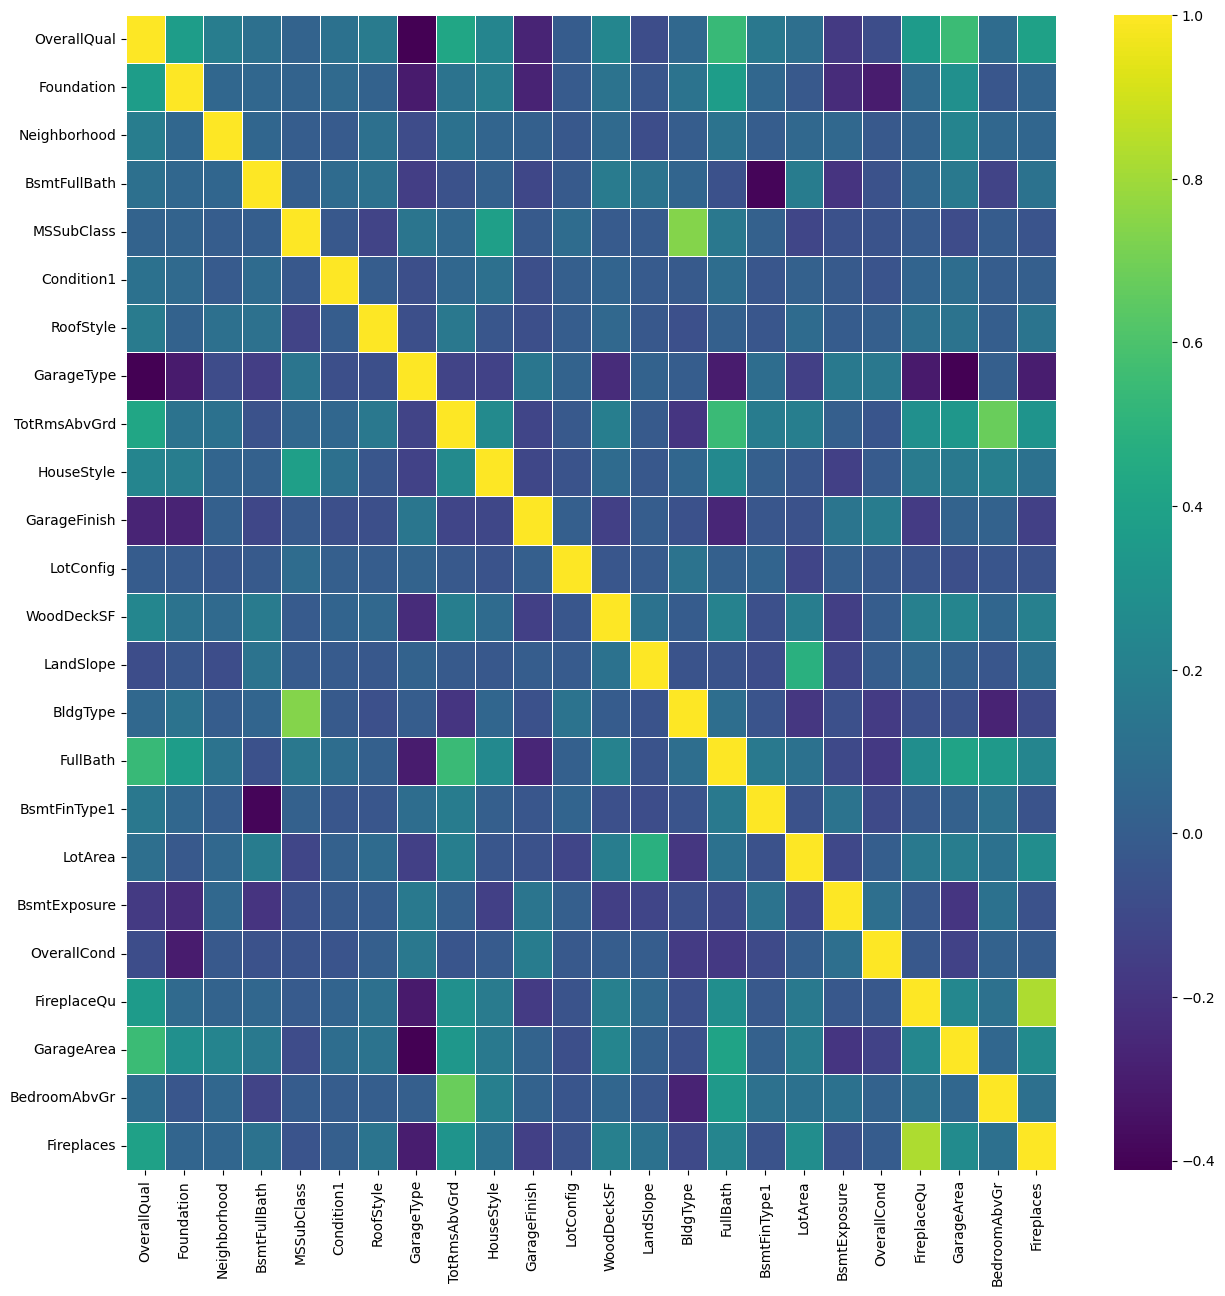

In [31]:
# Draw heatmap for p-values training dataframe
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = X_pval_train.corr()
sns.heatmap(corr_matrix, cmap='viridis', linewidth=.5, ax=ax)


In [32]:
# Save encoded, scaled, VIF, and p-values adjusted train and test data files for use in our modeling dataframes
X_pval_train.to_csv('Resources/housing_df_train_clean_revised.csv', index=False)
X_pval_test.to_csv('Resources/housing_df_test_clean_revised.csv', index=False)
y_train.to_csv('Resources/housing_df_y_train.csv', index=False)
y_test.to_csv('Resources/housing_df_y_test.csv', index=False)
print("housing_df_train_clean_revised.csv, housing_df_test_clean_revised, y_train, and y_test files saved")

housing_df_train_clean_revised.csv, housing_df_test_clean_revised, y_train, and y_test files saved


In [33]:
# Display first 5 rows of housing_df_train_clean_revised dataframe
X_pval_train.head()

,OverallQual,Foundation,Neighborhood,BsmtFullBath,MSSubClass,Condition1,RoofStyle,GarageType,TotRmsAbvGrd,HouseStyle,GarageFinish,LotConfig,WoodDeckSF,LandSlope,BldgType,FullBath,BsmtFinType1,LotArea,BsmtExposure,OverallCond,FireplaceQu,GarageArea,BedroomAbvGr,Fireplaces
1023,0.637073,2,0,-0.813995,1.475911,2,1,1,0.268177,2,1,4,0.458853,0,4,0.772872,3,-0.683950,4,-0.515364,3,-0.192617,-1.112669,0.591298
810,-0.094926,1,14,1.119464,-0.871228,2,3,1,-0.963076,2,2,4,1.295148,0,0,-1.062909,0,-0.054883,4,0.390453,2,0.030695,0.128036,0.591298
1384,-0.094926,0,7,-0.813995,-0.167086,2,1,5,-0.347450,0,3,4,-0.738046,0,0,-1.062909,5,-0.152524,3,-0.515364,0,-0.938576,-1.112669,-0.961392
626,-0.826925,1,12,-0.813995,-0.871228,2,3,1,-0.347450,2,2,4,-0.738046,0,0,-1.062909,6,0.144198,4,-0.515364,5,-0.910068,0.128036,0.591298
813,-0.094926,1,12,-0.813995,-0.871228,2,1,1,0.268177,2,2,4,-0.738046,0,0,-1.062909,5,-0.090142,4,0.390453,0,-0.838798,1.368742,-0.961392


In [34]:
# Display housing_df_train_clean_revised dataframe information
X_pval_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 1023 to 1126
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1095 non-null   float64
 1   Foundation    1095 non-null   int32  
 2   Neighborhood  1095 non-null   int32  
 3   BsmtFullBath  1095 non-null   float64
 4   MSSubClass    1095 non-null   float64
 5   Condition1    1095 non-null   int32  
 6   RoofStyle     1095 non-null   int32  
 7   GarageType    1095 non-null   int32  
 8   TotRmsAbvGrd  1095 non-null   float64
 9   HouseStyle    1095 non-null   int32  
 10  GarageFinish  1095 non-null   int32  
 11  LotConfig     1095 non-null   int32  
 12  WoodDeckSF    1095 non-null   float64
 13  LandSlope     1095 non-null   int32  
 14  BldgType      1095 non-null   int32  
 15  FullBath      1095 non-null   float64
 16  BsmtFinType1  1095 non-null   int32  
 17  LotArea       1095 non-null   float64
 18  BsmtExposure  1095 non-null   

In [35]:
# Display housing_df_train_clean_revised shape
X_pval_train.shape

(1095, 24)

In [36]:
# Display first 5 rows of housing_df_test_clean_revised dataframe
X_pval_test.head()

,OverallQual,Foundation,Neighborhood,BsmtFullBath,MSSubClass,Condition1,RoofStyle,GarageType,TotRmsAbvGrd,HouseStyle,GarageFinish,LotConfig,WoodDeckSF,LandSlope,BldgType,FullBath,BsmtFinType1,LotArea,BsmtExposure,OverallCond,FireplaceQu,GarageArea,BedroomAbvGr,Fireplaces
892,-0.094926,1,19,-0.813995,-0.871228,2,3,1,-0.347450,2,2,4,0.735061,0,0,-1.062909,3,-0.210929,4,2.202087,0,-1.014597,0.128036,-0.961392
1105,1.369073,2,15,1.119464,0.067628,2,1,1,1.499430,5,2,0,0.689026,0,0,0.772872,3,0.136423,0,-0.515364,5,1.113997,0.128036,2.143989
413,-0.826925,1,17,-0.813995,-0.636514,0,1,5,-0.963076,2,3,4,-0.738046,0,0,-1.062909,6,-0.161565,4,0.390453,3,-0.558469,-1.112669,0.591298
522,-0.094926,1,3,-0.813995,-0.167086,1,1,5,0.268177,0,3,0,-0.738046,0,0,0.772872,0,-0.519586,4,1.296270,3,-0.273390,0.128036,2.143989
1036,2.101072,2,23,1.119464,-0.871228,2,3,1,-0.347450,2,1,4,1.011268,0,0,0.772872,3,0.194466,2,-0.515364,1,2.064262,-1.112669,0.591298


In [37]:
# Display housing_df_test_clean_revised dataframe information
X_pval_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 892 to 1418
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   365 non-null    float64
 1   Foundation    365 non-null    int32  
 2   Neighborhood  365 non-null    int32  
 3   BsmtFullBath  365 non-null    float64
 4   MSSubClass    365 non-null    float64
 5   Condition1    365 non-null    int32  
 6   RoofStyle     365 non-null    int32  
 7   GarageType    365 non-null    int32  
 8   TotRmsAbvGrd  365 non-null    float64
 9   HouseStyle    365 non-null    int32  
 10  GarageFinish  365 non-null    int32  
 11  LotConfig     365 non-null    int32  
 12  WoodDeckSF    365 non-null    float64
 13  LandSlope     365 non-null    int32  
 14  BldgType      365 non-null    int32  
 15  FullBath      365 non-null    float64
 16  BsmtFinType1  365 non-null    int32  
 17  LotArea       365 non-null    float64
 18  BsmtExposure  365 non-null    in

In [38]:
# Display housing_df_test_clean_revised shape
X_pval_test.shape

(365, 24)

In [39]:
# Display housing_df_y_train shape
y_train.shape

(1095,)

In [40]:
# Display first 5 rows of housing_df_y_train dataframe
y_train.head()

1023    191000
810     181000
1384    105000
626     139900
813     157900
Name: SalePrice, dtype: int64

In [41]:
# Display housing_df_y_train dataframe information
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1095 entries, 1023 to 1126
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1095 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [42]:
# Display first 5 rows of housing_df_y_test dataframe
y_test.head()

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [43]:
# Display housing_df_y_test dataframe information
y_test.info()

<class 'pandas.core.series.Series'>
Index: 365 entries, 892 to 1418
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [44]:
# Display housing_df_y_test shape
y_test.shape

(365,)